### Contents

* Introduction
* Stage 1 : Data overview
    * 1.1 Goal
    * 1.2 Stages
* Stage 2 : Data preprocessing
    * 2.1 Inisialisasi
    * 2.2 Eksplorasi Data Awal
    * 2.3 Memuat Data
* Stage 3 : Data Preparation
    * 3.1 Mengganti nama kolom ke huruf kecil semua
    * 3.2 Menangani nilai yang hilang
    * 3.3 Mengkonversi tipe data yang salah
    * 3.4 Menghitul total penjualan di semua wilayah untuk tiap game
        
* Stage 4 : Exploratory Data Analysis (EDA).
    * 4.1  Meninjau berapa banyak game yang dirilis pada tahun yang berbeda dan apakah data di setiap periode signifikan?
    * 4.2  Bagaimana penjualan bervariasi dari satu platform ke platform lainnya
    * 4.3  Menentukan Periode Waktu Pengambilan Data
    * 4.4  Bekerja hanya dengan data yang relevan, dan abaikan data untuk tahun-tahun sebelumnya
    * 4.5  Membuat sebuah boxplot untuk penjualan global semua game yang dikelompokkan berdasarkan platform
    * 4.6  Lihat bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer
    * 4.7  Dengan mengingat kesimpulanmu, bandingkan penjualan game yang sama di platform lain.
    * 4.8  Mengamati distribusi umum game berdasarkan genre.

* Stage 5 : Analisis Data Statistik
    * 5.1 Berdasarkan Platform 
    * 5.2 Berdasarkan Genre
    * 5.3 Berdasarkan Rating
    
* Stage 6 : Ujji Hipotesis
    * 6.1  Rata-rata rating pengguna platform Xbox One dan PC adalah sama
    * 6.2  Rata-rata rating pengguna genre Action dan Sports berbeda

* Stage 7 : Kesimpulan Umum


###  Introduction

Setiap kali kita melakukan penelitian, kita membutuhkan formula hipotesis yang akan kita uji. Terkadang kita bisa menerima hipotesis tersebut, dan juga kita dapat menolaknya. Pebisnis harus paham untuk membuat asumsi yang tepat.

Dalam projek kali ini, kita akan menganalisis dan mengidentifikasi pola-pola yang menentukan apakah suatu game bisa dikatakan berhasil atau tidak. Terdapat data dari tahun 2016, sekarang adalah bulan Desember tahun 2016 dan kita sedang merencanakan kampanye untuk tahun 2017, Yang mana data tersebut akan dilakukan uji hipotesis berrikut :

   * Rata-rata rating pengguna platform Xbox One dan PC adalah sama. 
   * Rata-rata rating pengguna genre Action dan Sports berbeda.

## Data Overview

Kamu bekerja di toko online "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya, Xbox atau PlayStation), dan data historis penjualan game tersedia dari open source. Kamu perlu mengidentifikasi pola-pola yang menentukan apakah suatu game bisa dikatakan berhasil atau tidak. Dengan begitu, kamu bisa menemukan game yang paling potensial dan merencanakan kampanye iklannya.

Di depanmu ada data dari tahun 2016. Coba deh bayangkan bahwa sekarang adalah bulan Desember tahun 2016 dan kamu sedang merencanakan kampanye untuk tahun 2017. 

Yang terpenting adalah untuk mendapatkan pengalaman dalam bekerja dengan data. Tidak masalah apakah kamu meramalkan penjualan tahun 2017 berdasarkan data dari tahun 2016 atau meramalkan penjualan tahun 2017 berdasarkan data dari tahun 2016.

Dataset ini memuat singkatan ESRB. ESRB merupakan singkatan dari Entertainment Software Rating Board, yaitu sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.

### Goal

Tujuan Utama dalam Analisis Data ini adalah :

   1. Menganalisis dan Mengidentifikasi pola-pola yang menentukan apakah suatu game bisa dikatakan berhasil atau tidak.
    
### Stages

Data yang berasal dari departemen periklanan disimpan dalam file '/datasets/games.csv'.

Tidak terdapat informasi tentang kualitas data, sehingga kita harus eksplor data tersebut sebelum melakukan hipotesis.

Pertama, kita akan mengevaluasi kualitas data dan melihat apakah ada masalah yang signifikan. Kemudian, selama data preprocessing, kita akan menghitung masalah kritis.

Dalam projek ini terdiri dari empat tahapan : 

    1. Data overview
    2. Data preprocessing
    3. Exploratory Data Analysis (EDA)
    4. Analisis Data Statistik

## Data preprocessing

### Inisialisasi

Muat semua library yang dibutuhkan

In [1]:
# Import Library Data Processing
import pandas as pd, numpy as np

# Import Library Data Visualization
import matplotlib.pyplot as plt, seaborn as sns

# Import library Statistics
import scipy.stats as stats
from scipy.stats import ttest_ind,shapiro, mannwhitneyu

### Eksplorasi Data awal

Dataset yang kamu miliki berisi kolom-lolom berikut :

* Name (nama) 
* Platform 
* Year_of_Release (tahun rilis) 
* Genre 
* NA_sales (penjualan di Amerika Utara dalam satuan juta USD) 
* EU_sales (penjualan di Eropa dalam satuan juta USD) 
* JP_sales (penjualan di Jepang dalam satuan juta USD) 
* Other_sales (penjualan di negara lainnya dalam satuan juta USD) 
* Critic_Score (skor ulasan dari kritikus, maksimal 100) 
* User_Score (skor ulasan dari pengguna, maksimal 10) 
* Rating (ESRB)

### Memuat Data

In [2]:
# Muat file data menjadi DataFrame
path = '/datasets/games.csv'
df = pd.read_csv(path)

In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# tampilkan sampel data
df.sample(n=10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9714,Reader Rabbit Kindergarten,Wii,2010.0,Misc,0.12,0.00,0.00,0.01,NaN,tbd,E
14286,Safari Adventures: Africa,Wii,2007.0,Adventure,0.03,0.00,0.00,0.00,NaN,tbd,E
6707,Bolt,X360,2008.0,Adventure,0.18,0.05,0.00,0.02,57.0,7.1,E10+
8991,Terraria,PC,2011.0,Action,0.00,0.13,0.00,0.01,83.0,8.5,T
10963,Football Manager 2017,PC,2016.0,Simulation,0.00,0.09,0.00,0.01,81.0,4.3,E
10518,How to Train Your Dragon 2,PS3,2014.0,Adventure,0.03,0.06,0.00,0.02,NaN,tbd,E10+
12175,God Hand,PS2,2006.0,Action,0.00,0.00,0.07,0.00,73.0,7.7,M
4829,Monster Trucks Mayhem,Wii,2009.0,Racing,0.38,0.00,0.00,0.02,NaN,tbd,E
7201,Mega Man 64,N64,2000.0,Action,0.14,0.03,0.05,0.00,NaN,NaN,NaN
13922,Off-Road Drive,PC,2011.0,Racing,0.00,0.03,0.00,0.00,60.0,6.4,NaN


In [5]:
# cek nilai yang hilang
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by= 'missing_values', ascending=False)

,missing_values,% of total
Critic_Score,8578,0.51
Rating,6766,0.40
User_Score,6701,0.40
Year_of_Release,269,0.02
Name,2,0.00
Genre,2,0.00
Platform,0,0.00
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00


In [6]:
# cek duplikat
df.duplicated().sum()

0

**Kesimpulan Sementara**
1. Dataset mentah memiliki 16715 baris dan 11 kolom
2. Terdapat nilai yang hilang pada 6 kolom yaitu Critic_Score, rating, User_Score, Year_of_Release, Name dan Genre.
3. Terdapat tipe data yang salah yaitu Year_of_Release dan User_Score
4. Tidak terdapat duplikasi pada dataset

## Data Preparation

### Mengganti nama kolom ke huruf kecil semua



In [7]:
# cek data
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
# Mengganti semua nama kolom ke huruf kecil
df_rename = df.rename(columns={
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
})

In [9]:
# cek nama kolom
df_rename.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


* Nama kolom telah dirubah ke huruf kecil semua

### Menangani nilai yang hilang

* Kita akan menangani nilai yang hilang pada kolom yang memiliki nilai yang hilang tidak lebih dari 40% keseluruhan data, jadi kita hanya menangani pada kolom year_of_release, name dan genre

* Nilai yang hilang pada kolom critic_score, rating, dan user_score akan kita biarkan terlebih dahulu, karena jumlah nilai yang hilang sekitar 50% dari keselurahan nilai pada kolom.

* Penyebab nilai yang hilang ada banyak kemungkinan, diantaranya kesalahan input data, human error, dan lainnya.


In [10]:
# cek kembali nilai yang hilang
missing_value = df_rename.isna().sum().to_frame()
missing_value = missing_value.rename(columns = {0: 'missing_values'})
missing_value['% of total'] = (missing_value['missing_values'] / df_rename.shape[0]).round(2)
missing_value.sort_values(by= 'missing_values', ascending=False)

,missing_values,% of total
critic_score,8578,0.51
rating,6766,0.40
user_score,6701,0.40
year_of_release,269,0.02
name,2,0.00
genre,2,0.00
platform,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


In [11]:
# Menghapus nilai yang hilang pada kolom name
df_rename_clean = df_rename[(df_rename['name'].notnull())].reset_index(drop=True)

In [12]:
# Menghapus nilai yang hilang pada kolom genre
df_rename_clean = df_rename[(df_rename['genre'].notnull())].reset_index(drop=True)

In [13]:
# Mengisi nilai yang hilang pada kolom year_of_release dengan nilai 0
df_rename_clean['year_of_release'] = df_rename_clean['year_of_release'].fillna(0)

In [14]:
# cek nilai yang hilang lagi
df_rename_clean.isnull().sum().sort_values()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
user_score         6699
rating             6764
critic_score       8576
dtype: int64

**Kesimpulan Sementara**

1. Nilai yang hilang pada kolom critic_score, rating, dan user_score akan kita biarkan terlebih dahulu, karena jumlah nilai yang hilang sekitar 50% dari keselurahan nilai pada kolom.
2. Menghapus nilai yang hilang pada kolom name dan age karena jumlah nya hanya sedikit sehingga tidak berpengaruh pada keseluruhan data dan untuk mempermudah analisis
3. Mengisi nilai yang hilang pada kolom year_of_release dengan nilai 0, untuk mempermudah analisis

### Mengkonversi tipe data yang salah

* Kita akan merubah tipe data pada kolom year_of_release dan user_score
* Terdapat singkatan tbd atau to be determined pada kolom user score yang bertipe object, tapi bernilai pecahan, untuk itu rubah tipe data nya ke float

In [15]:
# cek tipe data
df_rename_clean.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [16]:
# Mengganti tipe data pada kolom year_of_release ke int
df_rename_clean['year_of_release'] = df_rename_clean['year_of_release'].astype('int16')

In [17]:
# cek kolom user_score
df_rename_clean['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1         2
0.3       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [18]:
# ganti tbd menjadi nan
df_rename_clean['user_score'] = df_rename_clean['user_score'].replace('tbd', np.nan) #nan null

In [19]:
# ganti tipe data ke float
df_rename_clean['user_score'] = df_rename_clean['user_score'].astype('float64')

In [20]:
# cek tipe data
df_rename_clean.dtypes

name                object
platform            object
year_of_release      int16
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

**Kesimpulan Sementara**
1. Mengganti tipe data pada kolom year_of_release dari float ke int, karena tahun tidak mungkin bernilai pecahan
2. Mengganti tipe data pada kolom user_score dari object ke float64

###  Menghitung total penjualan di semua wilayah untuk tiap game

Membuat kolom baru untuk memasukkan nilai total penjualan

In [21]:
# cek kolom rating
df_rename_clean['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [22]:
# cek data
df_rename_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
# Membuat kolom baru total_sales
df_rename_clean['total_sales'] = df_rename_clean[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [24]:
# cek data nya lagi
df_rename_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


**Kesimpulan Sementara**
* Membuat kolom baru yaitu total_sales yang berisi total penjualan di semua wilayah untuk setiap game

## Exploratory Data Analysis (EDA)

### Meninjau berapa banyak game yang dirilis pada tahun yang berbeda dan apakah data di setiap periode signifikan?

In [25]:
# Groupby year_of_release dan name
df_year = df_rename_clean.groupby(['year_of_release'])['name'].count().reset_index().astype('int16')

# hapus kolom yang bernilai 0 tahun
df_year = df_year[df_year['year_of_release'] != 0]

df_year

,year_of_release,name
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15
10,1989,17


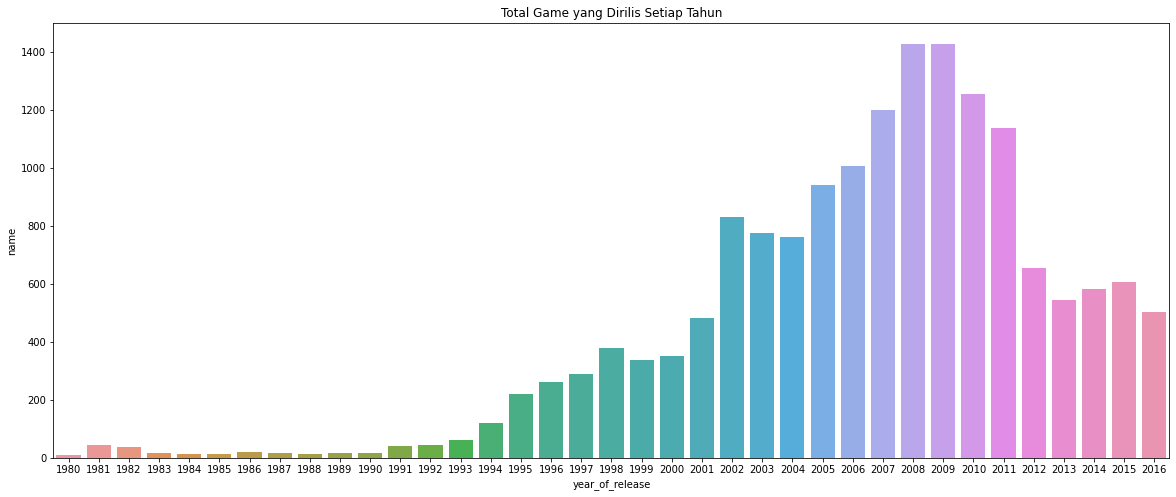

In [26]:
plt.figure(figsize=(20,8))
plt.title('Total Game yang Dirilis Setiap Tahun')
sns.barplot(data=df_year, x='year_of_release', y='name');

In [27]:
# cari min, max, mean, dan median
min_year = df_year['year_of_release'].min()
max_year = df_year['year_of_release'].max()
mean_year = df_year['year_of_release'].mean()
median_year = df_year['year_of_release'].median()

print("Min Year:", min_year)
print("Max Year:", max_year)
print("Mean Year:", mean_year)
print("Median Year:", median_year)

print('===================================')

count_min_year = df_year['name'].min()
count_max_year = df_year['name'].max()
count_mean_year = df_year['name'].mean()
count_median_year = df_year['name'].median()

print("Jumlah Min Year:", count_min_year)
print("Jumlah Max Year:", count_max_year)
print("Jumlah Mean Year:", count_mean_year)
print("Jumlah Median Year:", count_median_year)

Min Year: 1980
Max Year: 2016
Mean Year: 1998.0
Median Year: 1998.0
Jumlah Min Year: 9
Jumlah Max Year: 1427
Jumlah Mean Year: 444.43243243243245
Jumlah Median Year: 338.0


**Kesimpulan Sementara**
* findings :
    * Rata-rata jumlah game yang dirilis setiap tahun dari tahun 1980 hingga 2016 adalah 444 
    * Median game yang dirilis setiap tahun dari tahun 1980 hingga 2016 adalah 338
    * Tahun 1980 adalah tahun yang paling sedikit merilis game, yang hanya merilis 9 game 
    * Tahun 2008 adalah tahun yang paling banyak merilis game, yang merilis game sebanyak 1427 game

* insight :
    * Jumlah Game yang dirilis semakin meningkat dari 1980 hingga 2009
    * Tahun 2008 dan 2009 merupakan tahun yang paling banyak merilis game
    * Setelah tahun 2009 jumlah game yang rilis setiap tahun semakin menurun

###  Bagaimana penjualan bervariasi dari satu platform ke platform lainnya

* Memilih platform dengan total penjualan terbesar dan membuat distribusinya berdasarkan data per tahun. 
* Mencari platform yang dahulu populer, tetapi sekarang tidak memiliki penjualan apa pun. 
* Berapa lama biasanya waktu yang dibutuhkan platform baru untuk muncul dan platform lama untuk memudar popularitasnya?

In [28]:
# cek kembali data nya
df_rename_clean.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [29]:
# pilih platform dengan total penjualan terbesar
df_sales = df_rename_clean.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()
df_sales

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


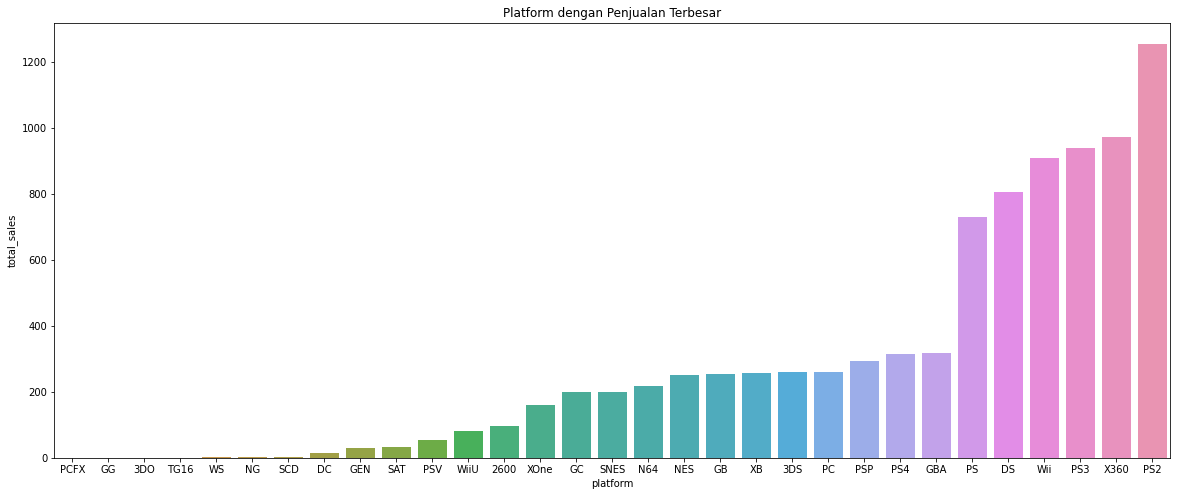

In [30]:
# buat grafik nya
plt.figure(figsize=(20,8))
plt.title('Platform dengan Penjualan Terbesar')
sns.barplot(data=df_sales, x='platform', y='total_sales')
plt.show()

In [31]:
# cari min, max, mean, dan median

count_min_platform = df_sales['total_sales'].min()
count_max_platform = df_sales['total_sales'].max()
count_mean_platform = df_sales['total_sales'].mean()
count_median_platform = df_sales['total_sales'].median()

print("Jumlah Min Platform:", count_min_platform)
print("Jumlah Max Platform:", count_max_platform)
print("Jumlah Mean Platform:", count_mean_platform)
print("Jumlah Median Platform:", count_median_platform)

Jumlah Min Platform: 0.03
Jumlah Max Platform: 1255.7699999999925
Jumlah Mean Platform: 287.52548387096624
Jumlah Median Platform: 200.04000000000022


* findings :
    * Jumlah penjualan game yang paling sedikit hanya 0.03 juta USD
    * Jumlah penjualan game yang paling banyak adalah sekitar 1255 juta USD
    * Rata-rata jumlah penjualan game adalah 287 juta USD
    * 50% penjualan game dibawah 200 juta USD
    * Platform PS2 adalah game yang memiliki jumlah penjualan paling banyak yaitu sebesar 1255 juta USD
    
* insight :
    * Jarang orang membeli game yang kurang terkenal

In [32]:
# hapus kolom tahun yang memiliki nilai 0
df_rename_clean_pivot = df_rename_clean[df_rename_clean['year_of_release']!=0].reset_index(drop=True)

In [33]:
# Buat distribusinya berdasarkan data per tahun
df_lifetime = pd.pivot_table(df_rename_clean_pivot, 
                             index='year_of_release', 
                             columns='platform',
                             values='total_sales', 
                             aggfunc='sum').fillna(0).astype('int16')

df_lifetime

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1988,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# cek jumlah kolom
df_lifetime.columns

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='platform')

In [35]:
# cek jumlah kolom
len(df_lifetime.columns)

31

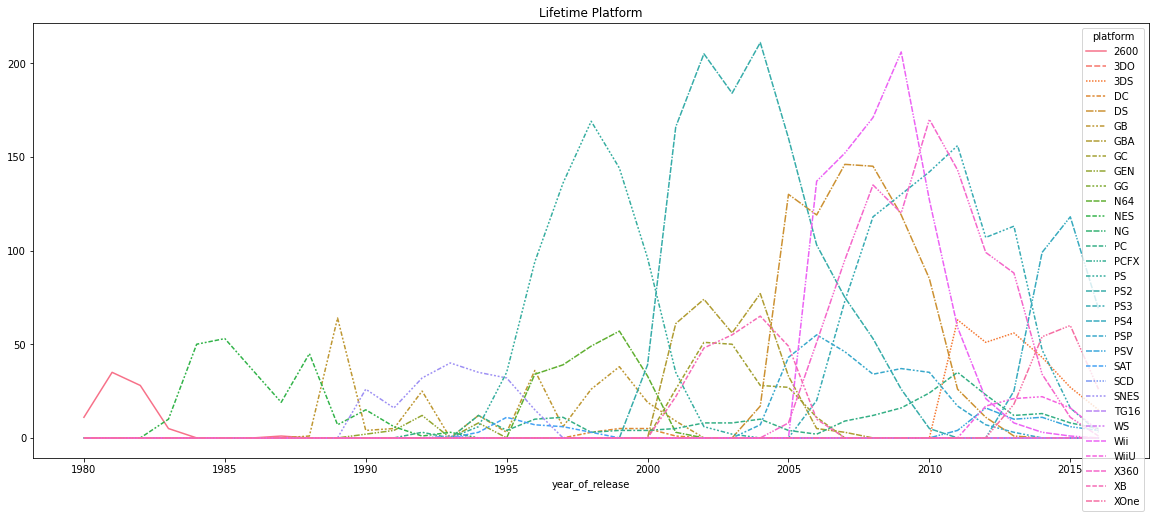

In [36]:
plt.figure(figsize=(20,8))
plt.title('Lifetime Platform')
sns.lineplot(data=df_lifetime)
plt.show()

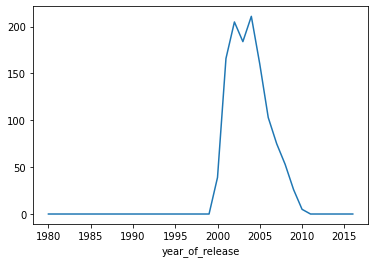

In [37]:
df_lifetime['PS2'].plot()
plt.show()

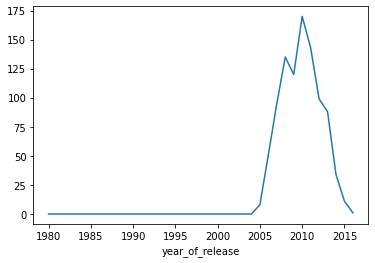

In [38]:
df_lifetime['X360'].plot()
plt.show()

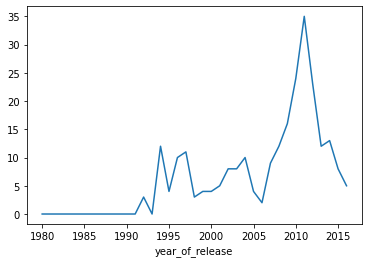

In [39]:
df_lifetime['PC'].plot()
plt.show()

**Kesimpulan Sementara**
* Findings :

    * Tren Rilis Game: Data menunjukkan tren rilis game untuk berbagai platform dari tahun 1980 hingga 2016. Beberapa platform memiliki puncak rilis game dalam beberapa tahun tertentu, sementara yang lainnya memiliki rilis game yang konstan sepanjang waktu.
    * Platform Populer: Platform seperti GB (Game Boy), DS, PS (PlayStation), dan Wii memiliki tingkat rilis game yang signifikan selama beberapa tahun. Ini menunjukkan popularitas dan daya tarik konstan dari platform ini dalam jangka waktu tertentu.
    * Kehadiran Platform Baru: Terdapat munculnya platform baru seiring berjalannya waktu, seperti 3DS, Xbox 360, dan Xbox One. Platform-platform ini muncul dalam beberapa tahun tertentu dan kemudian terus berkembang seiring berjalannya waktu.
    * Platform yang Membudar: Beberapa platform, seperti platform lama seperti GB (Game Boy) dan SNES (Super Nintendo Entertainment System), mulai mengalami penurunan rilis game setelah mencapai puncak popularitas mereka.


* Insight :

    * Pengaruh Tren Industri: Perubahan dalam tren industri game, perkembangan teknologi, dan pergeseran minat gamer dapat mempengaruhi jumlah rilis game untuk platform tertentu. Hal ini tercermin dalam fluktuasi dalam data.
    * Platform Tersebar: Data menunjukkan bahwa sebagian besar platform cenderung menghilang setelah beberapa tahun rilis pertama mereka. Namun, beberapa platform berhasil bertahan dan terus berkembang seiring berjalannya waktu.
    * Lifetime : Masa Hidup sebuah platform tidak menentu, ada yang lifetime nya pendek dan cukup panjang, berdasarkan data, rata-rata lifetime platform adalah sekitar 10 tahun, akan tetapi angka tersebut tidak pasti, karena data yang fluktuatif

### Menentukan Periode Waktu Pengambilan Data
Untuk melakukannya, lihat jawaban di pertanyaan sebelumnya. Data yang diambil seharusnya memungkinkan  untuk membangun model bagi tahun 2017.

In [40]:
# cek datanya kembali
df_rename_clean.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [41]:
# filter / ambil data nya 3 tahun kebelakang karena perubahan industri game cepat berkembang
new_df = df_rename_clean[df_rename_clean['year_of_release'] >= 2013].reset_index(drop=True)
new_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [42]:
# cek row & kolom
df_rename_clean.shape, new_df.shape

((16713, 12), (2233, 12))

**Kesimpulan Sementara**
* Terdapat data dari tahun 2016, sekarang adalah bulan Desember tahun 2016 dan kita sedang merencanakan kampanye untuk tahun 2017. 
* Pada umumnya, dalam dunia industri, data masih valid jika dan hanya jika berusia 5 tahun, artinya data masih relevan untuk lima tahun ke belakang. 
* Akan tetapi dalam industri game cepat sekali berkembang dan berubah, untuk itu kita perlu memfilter atau mengambil data hanya 3 tahun kebelakang hingga 2013
* Data awal memiliki 16713 baris, akan tetapi setelah di filter data hanya terdapat 2233 baris data yang relevan

### Bekerja hanya dengan data yang relevan, dan abaikan data untuk tahun-tahun sebelumnya

In [43]:
# platform mana saja yang memiliki penjualan terbanyak?
new_df_platform_sales = new_df.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()
new_df_platform_sales

,platform,total_sales
0,DS,1.54
1,PSP,3.50
2,Wii,13.66
3,PSV,32.99
4,PC,39.43
5,WiiU,64.63
6,X360,136.80
7,3DS,143.25
8,XOne,159.32
9,PS3,181.43


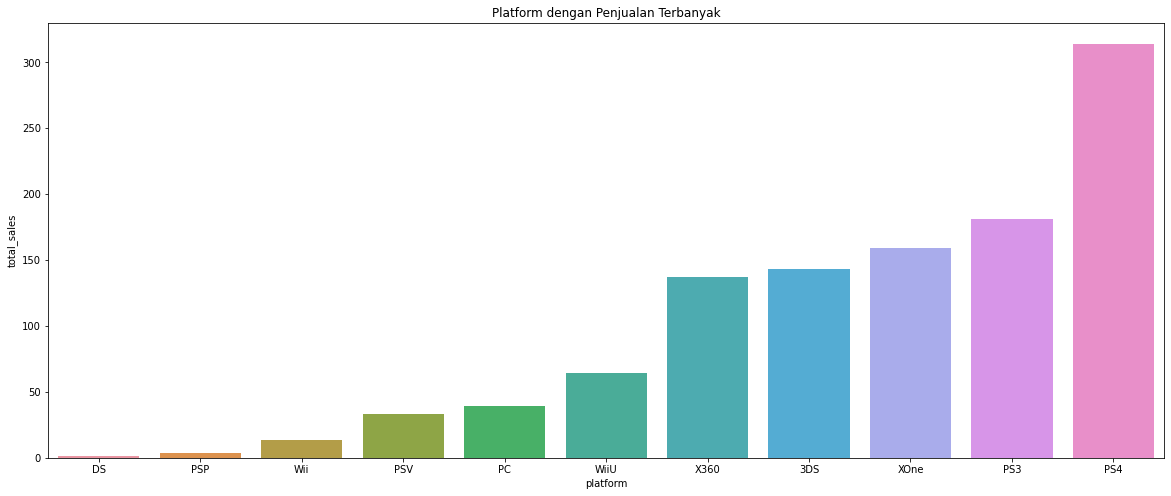

In [44]:
# Buat grafiknya
plt.figure(figsize=(20,8))
plt.title('Platform dengan Penjualan Terbanyak')
sns.barplot(data=new_df_platform_sales, x='platform', y='total_sales')
plt.show()

* findings :
    * Platform yang memiliki hasil penjualan terbanyak dalam 3 tahun terakhir adalah PS4, lalu PS3 dan XOne
    * Platform yang memiliki hasil penjualan paling sedikit dalam 3 tahun terakhir adalah DS
* insight :
    * Dalam 3 tahun terakhir orang lebih suka main PS4
    * Platform DS semakin berlalunya waktu penjualannya kurang laku

In [45]:
# platform mana saja yang tumbuh dan menyusut?
new_df_lifetime = pd.pivot_table(new_df, 
                             index='year_of_release', 
                             columns='platform',
                             values='total_sales', 
                             aggfunc='sum').fillna(0).astype('int16')

new_df_lifetime

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56,1,12,113,25,3,10,8,21,88,18
2014,43,0,13,47,99,0,11,3,22,34,54
2015,27,0,8,16,118,0,6,1,16,11,60
2016,15,0,5,3,69,0,4,0,4,1,26


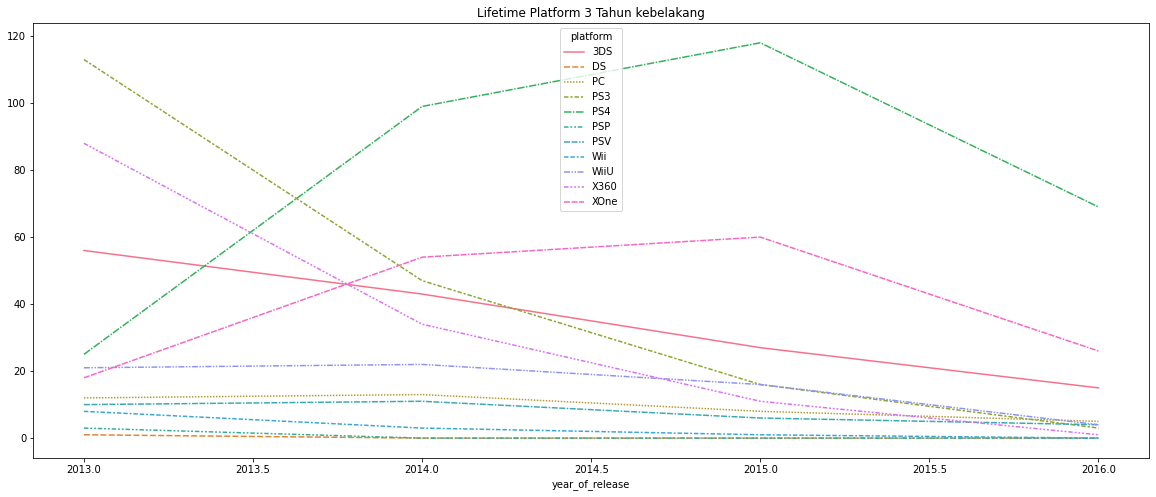

In [46]:
# buat grafiknya
plt.figure(figsize=(20,8))
plt.title('Lifetime Platform 3 Tahun kebelakang')
sns.lineplot(data=new_df_lifetime)
plt.show()

* findings:
    * Platform PS4 mengalami kenaikan penjualan hingga 2015, akan tetapi pada 2016 penjualannya menurun
    * Dalam 3 tahun terakhir, semua platform mengalami penjualan fluktuatif
    * Hampir semua platform mengalami penurunan penjualan setiap tahun

In [47]:
# Piih beberapa platform yang berpotensi menghasilkan keuntungan
new_df_profit = new_df_platform_sales[new_df_platform_sales['total_sales']>=50].reset_index(drop=True)
new_df_profit

,platform,total_sales
0,WiiU,64.63
1,X360,136.80
2,3DS,143.25
3,XOne,159.32
4,PS3,181.43
5,PS4,314.14


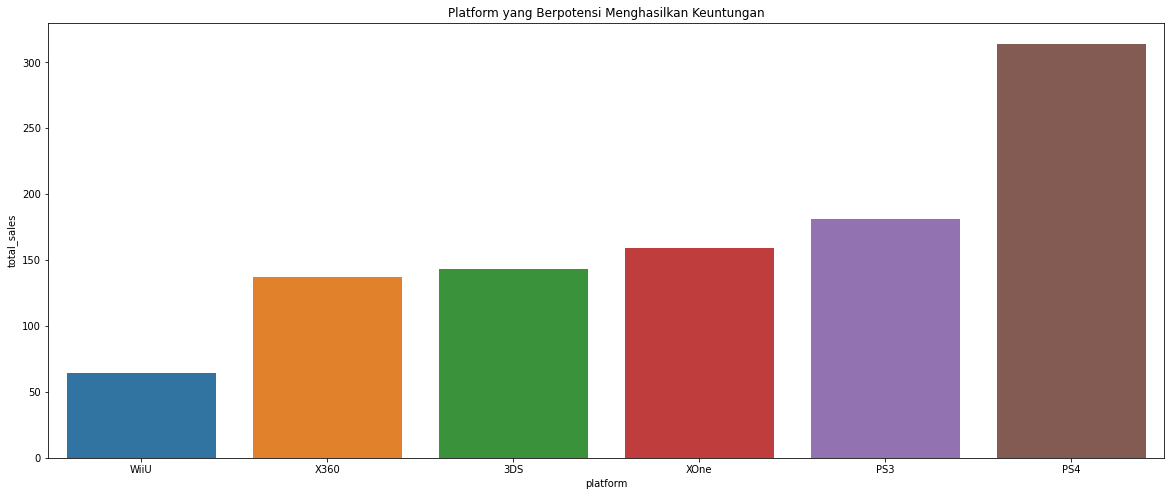

In [48]:
# buat grafiknya
plt.figure(figsize=(20,8))
plt.title('Platform yang Berpotensi Menghasilkan Keuntungan')
sns.barplot(data=new_df_profit, x='platform', y='total_sales')
plt.show()

**Kesimpulan Sementara**

   * Sebuah platform berpotensi menghasilkan keuntungan ketika platform tersebut mengalami total penjualan lebih dari 50 juta USD
   * Platform yang berpotensi menghasilkan keuntungan adalah platform WiiU, X360, 3DS, XOne, PS3 dan PS4

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Membuat sebuah boxplot untuk penjualan global semua game yang dikelompokkan berdasarkan platform.  

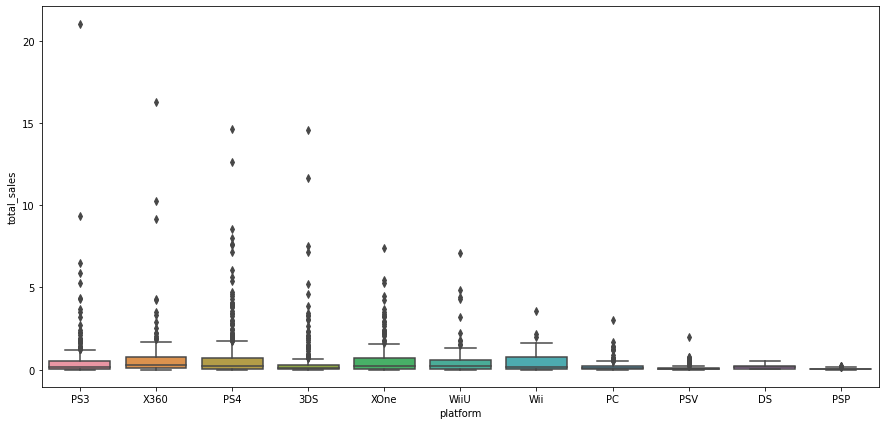

In [49]:
# Buat boxplot untuk penjualan global semua game yang di kelompokkan berdasarkan platform
plt.figure(figsize=(15,7))
sns.boxplot(data=new_df, x='platform', y='total_sales')
plt.show()

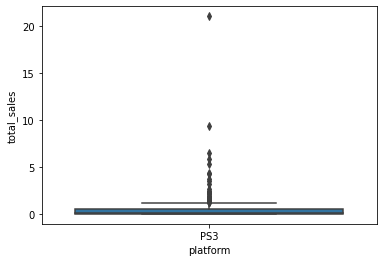

In [50]:
# contoh boxplot per platform
sns.boxplot(data=new_df[new_df['platform']=='PS3'], x='platform', y='total_sales')
plt.show()

In [51]:
# cek min, max, mean, median
new_df.groupby(['platform']).agg({
    'total_sales': ['mean', 'median', 'max', 'min']
})

total_sales                    
                mean median    max   min
platform                                
3DS         0.472772  0.090  14.60  0.01
DS          0.192500  0.150   0.51  0.03
PC          0.208624  0.080   3.05  0.01
PS3         0.525884  0.150  21.05  0.01
PS4         0.801378  0.200  14.63  0.01
PSP         0.052239  0.020   0.24  0.01
PSV         0.092151  0.040   1.96  0.01
Wii         0.593913  0.180   3.58  0.01
WiiU        0.562000  0.200   7.09  0.01
X360        0.735484  0.265  16.27  0.01
XOne        0.645020  0.220   7.39  0.01

**Kesimpulan Sementara**

1. PS4 memiliki rata-rata penjualan sekitar 0.8014, sedangkan PSP hanya memiliki rata-rata sekitar 0.0522. Perbedaan ini cukup signifikan.
2. Jika kita melihat median, PS3 memiliki nilai tengah sekitar 0.150, sementara PS4 memiliki nilai tengah sekitar 0.200. Meskipun perbedaan ini mungkin tidak sebesar perbedaan dalam mean, masih ada perbedaan yang cukup signifikan.
3. Nilai maksimum (max) dan minimum (min) juga menunjukkan perbedaan yang signifikan antara platform, seperti PS3 yang memiliki penjualan maksimum sekitar 21.05, sementara PSP hanya memiliki penjualan maksimum sekitar 0.24.

4. Rata-rata penjualan (mean) pada berbagai platform bervariasi. Beberapa platform memiliki rata-rata penjualan yang lebih tinggi daripada yang lain. Contoh rata-rata penjualan platform tersebut adalah sebagai berikut:

    * PS4 memiliki rata-rata penjualan sekitar 0.8014.
    * X360 memiliki rata-rata penjualan sekitar 0.7355.
    * Wii memiliki rata-rata penjualan sekitar 0.5939.
    * PS3 memiliki rata-rata penjualan sekitar 0.5259.
    * XOne memiliki rata-rata penjualan sekitar 0.6450.

### Lihat bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer. 

Buat sebuah scatter plot dan hitung korelasi antara ulasan dan penjualan.

In [52]:
# Pilih salah 1 platform populer dan lihat ulasan nya
df_PS4 = new_df.groupby(['platform', 'name'])[['total_sales', 'critic_score', 'user_score']].sum().query('platform == "PS4" and critic_score > 0 and user_score > 0').reset_index()
df_PS4

,platform,name,total_sales,critic_score,user_score
0,PS4,7 Days to Die,0.14,45.0,5.9
1,PS4,Aegis of Earth: Protonovus Assault,0.02,57.0,7.8
2,PS4,Agatha Christie's The ABC Murders,0.02,67.0,6.2
3,PS4,Alien: Isolation,1.12,79.0,8.1
4,PS4,Angry Birds Star Wars,0.22,47.0,2.0
...,...,...,...,...,...
244,PS4,World of Final Fantasy,0.34,77.0,8.3
245,PS4,Worms: WMD,0.03,78.0,7.6
246,PS4,XCOM 2,0.14,88.0,8.0
247,PS4,Zombie Army Trilogy,0.20,62.0,6.8


In [53]:
df_PS4.corr()['total_sales']

total_sales     1.000000
critic_score    0.405895
user_score     -0.033625
Name: total_sales, dtype: float64

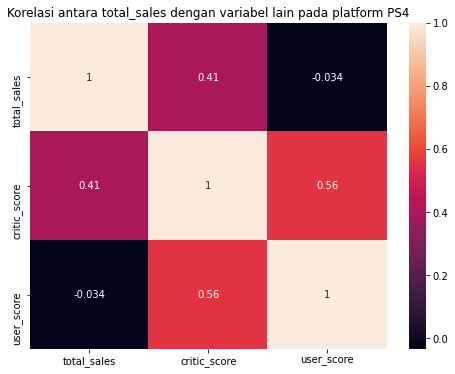

In [54]:
# buat korelasinya
plt.figure(figsize=(8,6))
plt.title('Korelasi antara total_sales dengan variabel lain pada platform PS4')
sns.heatmap(df_PS4.corr(), annot=True)
plt.show()

* Findings : 

**Korelasi antara total_sales dengan variabel lain pada Platform PS4**

* A. Korelasi kolom total_sales dengan kolom lain 
    1. Korelasi total_sales dengan critic_score adalah 0.41 artinya semakin banyak total_sales maka cukup tinggi pula pengaruh critic_score (korelasi medium)
    2. Korelasi total_sales dengan user_score adalah -0.034 artinya tidak ada pengaruh user_score terhadap total_sales
    
    
* B. Korelasi kolom critic_score dengan kolom lain
    1. Korelasi critic_score dengan user_score adalah 0.56 artinya semakin banyak nilai critic_score diberikan maka nilai user_score juga semakin naik akan tetapi tidak terlalu banyak (korelasi medium)
    

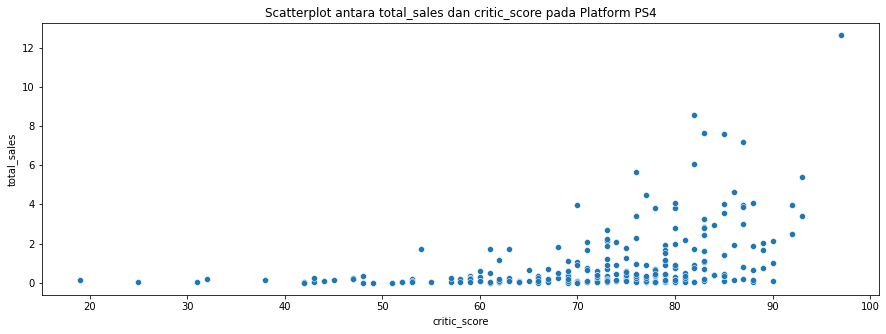

In [55]:
# scatterplot antara total_sales dan critic_score
plt.figure(figsize=(15,5))
plt.title('Scatterplot antara total_sales dan critic_score pada Platform PS4')
sns.scatterplot(data=df_PS4, x='critic_score', y='total_sales')
plt.show()

* findings : 
    * Berdasarkan visualisasi data diatas, dapat disimpulkan bahwa korelasi antara total_sales dan critic_score pada Platform PS4 adalah korelasi medium artinya semakin banyak nilai critic_score maka total penjualan juga semakin naik akan tetapi tidak terlalu banyak

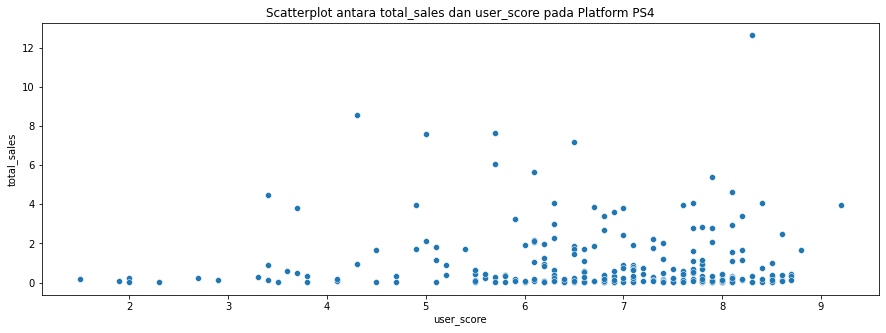

In [56]:
# scatterplot antara total_sales dan user_score
plt.figure(figsize=(15,5))
plt.title('Scatterplot antara total_sales dan user_score pada Platform PS4')
sns.scatterplot(data=df_PS4, x='user_score', y='total_sales')
plt.show()

* findings :
    * Berdasarkan visualisasi data diatas, dapat disimpulkan bahwa pada Platform PS4 tidak terdapat korelasi antara total_sales dan user_score 

### Dengan mengingat kesimpulanmu, bandingkan penjualan game yang sama di platform lain.

In [57]:
# Pilih salah 1 platform lain dan lihat ulasan nya
df_PC = new_df.groupby(['platform', 'name'])[['total_sales', 'critic_score', 'user_score']].sum().query('platform == "PC" and critic_score > 0 and user_score > 0').reset_index()
df_PC

,platform,name,total_sales,critic_score,user_score
0,PC,Act of Aggression,0.01,71.0,7.1
1,PC,Agatha Christie: The ABC Murders,0.02,66.0,8.5
2,PC,Alien: Isolation,0.15,81.0,8.4
3,PC,Aliens: Colonial Marines,0.18,45.0,3.5
4,PC,Anno 2205,0.26,72.0,5.9
...,...,...,...,...,...
143,PC,Wolfenstein: The Old Blood,0.08,76.0,7.6
144,PC,World of Warcraft: Legion,0.32,88.0,7.5
145,PC,World of Warcraft: Warlords of Draenor,0.47,87.0,5.9
146,PC,X Rebirth,0.08,33.0,3.3


In [58]:
df_PC.corr()['total_sales']

total_sales     1.000000
critic_score    0.194124
user_score     -0.109235
Name: total_sales, dtype: float64

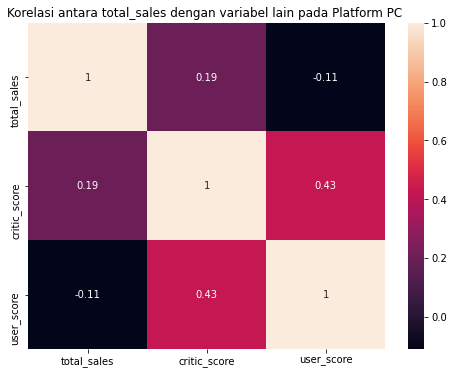

In [59]:
# buat korelasinya
plt.figure(figsize=(8,6))
plt.title('Korelasi antara total_sales dengan variabel lain pada Platform PC ')
sns.heatmap(df_PC.corr(), annot=True)
plt.show()

* Findings : 

**Korelasi antara total_sales dengan variabel lain pada Platform PC**

* A. Korelasi kolom total_sales dengan kolom lain 
    1. Korelasi total_sales dengan critic_score adalah 0.19 artinya semakin tinggi nilai critic_score maka total penjualan juga naik tapi tidak banyak (korelasi lemah)
    2. Korelasi total_sales dengan user_score adalah -0.11 artinya semakin rendah nilai user_score maka total penjualan akan naik tapi tidak banyak (korelasi lemah terbalik)
    
    
* B. Korelasi kolom critic_score dengan kolom lain
    1. Korelasi critic_score dengan user_score adalah 0.43 artinya semakin banyak nilai critic_score diberikan maka nilai user_score juga semakin naik akan tetapi tidak terlalu banyak (korelasi medium)

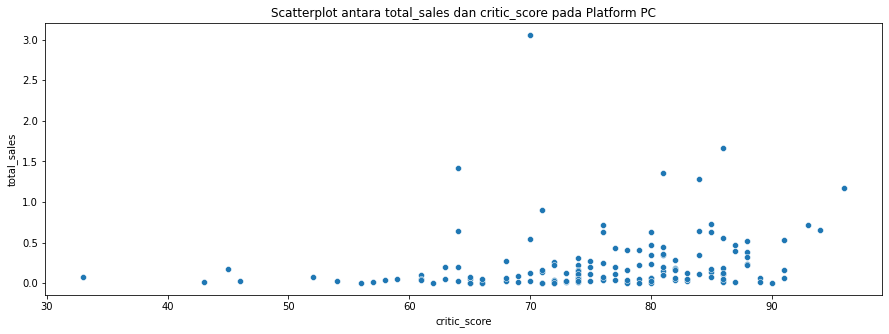

In [60]:
# scatterplot antara total_sales dan critic_score
plt.figure(figsize=(15,5))
plt.title('Scatterplot antara total_sales dan critic_score pada Platform PC')
sns.scatterplot(data=df_PC, x='critic_score', y='total_sales')
plt.show()

* findings : 
    * Berdasarkan visualisasi data diatas, dapat disimpulkan bahwa korelasi antara total_sales dan critic_score pada Platform PC adalah korelasi lemah artinya semakin tinggi nilai critic_score maka total penjualan juga naik tapi tidak banyak

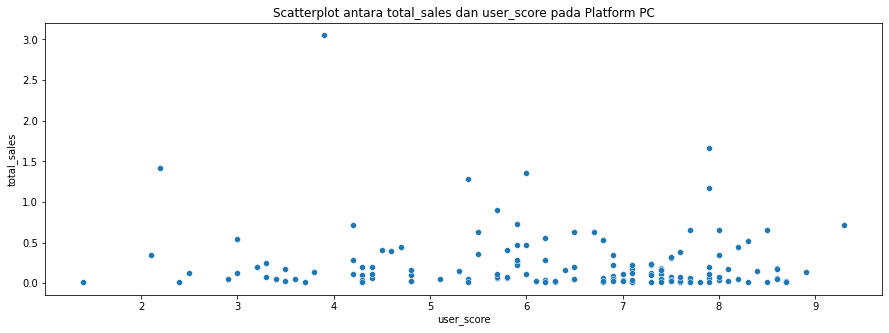

In [61]:
# scatterplot antara total_sales dan user_score
plt.figure(figsize=(15,5))
plt.title('Scatterplot antara total_sales dan user_score pada Platform PC')
sns.scatterplot(data=df_PC, x='user_score', y='total_sales')
plt.show()

* findings :
    * Berdasarkan visualisasi data diatas, dapat disimpulkan bahwa korelasi antara total_sales dan user_score pada platform PC terdapat korelasi lemah terbalik artinya semakin rendah nilai user_score maka total penjualan akan naik tapi tidak banyak

###  Mengamati distribusi umum game berdasarkan genre. 

* Apa yang bisa kita simpulkan terkait genre yang paling menguntungkan? Bisakah kamu melakukan generalisasi terkait genre dengan penjualan yang tinggi dan rendah?

In [62]:
new_df['genre'].value_counts() 

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

In [63]:
df_genre = new_df.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
df_genre

,genre,total_sales
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


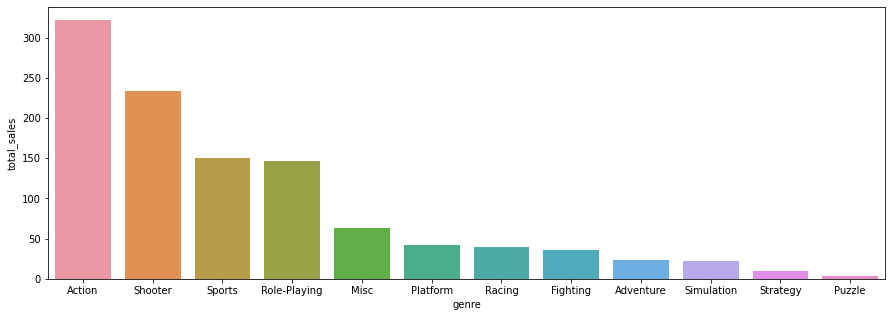

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_genre, x='genre', y='total_sales')
plt.show()

* findings : 
    * Genre Action merupakan genre yang memiliki total penjualan terbanyak
    * Genre Puzzle merupakan genra yang memiliki total penjualan paling sedikit

* insight :
    * Orang-orang lebih sering dan suka bermain game yang bergenre Action daripada genre lainnya
    * Genre Shooter, Sports, dan Role-Playing juga merupakan genre yang banyak orang memainkannya
    * Orang jarang mau membeli game yang bergenre puzzle

In [65]:
df_genre2 = new_df.groupby(['genre', 'name'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
df_genre2

,genre,name,total_sales
142,Action,Grand Theft Auto V,56.58
1040,Shooter,Call of Duty: Ghosts,27.39
1039,Shooter,Call of Duty: Black Ops 3,25.67
683,Misc,Minecraft,24.16
1038,Shooter,Call of Duty: Advanced Warfare,21.97
...,...,...,...
521,Adventure,Ro-Kyu-Bu! Secret Photo Op,0.01
115,Action,Fast Racing Neo,0.01
518,Adventure,Rewrite,0.01
113,Action,Farming Simulator 15 Expansion Pack,0.01


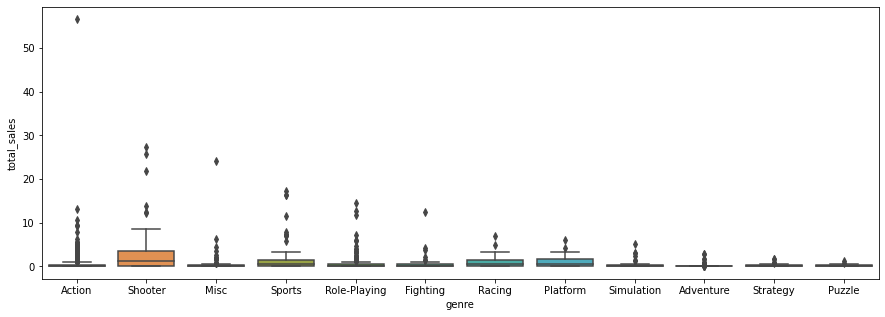

In [66]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_genre2, x='genre', y='total_sales')
plt.show()

* findings : 
    * Genre Action merupakan genre yang memiliki total penjualan terbanyak
    * Genre Puzzle merupakan genra yang memiliki total penjualan paling sedikit
    * Hampir semua genre memiliki outlier total penjualan

* insight :
    * Orang-orang lebih sering dan suka bermain game yang bergenre Action daripada genre lainnya
    * Genre Shooter, Sports, dan Role-Playing juga merupakan genre yang banyak orang memainkannya
    * Orang jarang mau membeli game yang bergenre puzzle

## Melakukan Pemrofilan Pengguna untuk Masing-Masing Wilayah

Untuk setiap wilayah (NA, EU, JP), Menentukan:
* 5 platform teratas. Jelaskan variasi pangsa pasar dari satu wilayah ke wilayah lainnya.
* 5 genre teratas. Jelaskan perbedaannya.Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?

### Berdasarkan Platform

In [67]:
# cek total penjualan setiap platform
new_df.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()

,platform,total_sales
0,DS,1.54
1,PSP,3.50
2,Wii,13.66
3,PSV,32.99
4,PC,39.43
5,WiiU,64.63
6,X360,136.80
7,3DS,143.25
8,XOne,159.32
9,PS3,181.43


In [68]:
# Agregasikan platform
platform_sales_agg = new_df.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales']].sum()
platform_sales_agg2 = new_df.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

In [69]:
platform_sales_agg2['total_sales'] = platform_sales_agg2[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)
platform_sales_agg2['jp_sales_ms'] = platform_sales_agg2['jp_sales'] / platform_sales_agg2['total_sales'] * 100

platform_sales_agg2

,platform,na_sales,eu_sales,jp_sales,total_sales,jp_sales_ms
0,3DS,38.20,30.96,67.81,136.97,49.507191
1,DS,0.57,0.85,0.00,1.42,0.000000
2,PC,11.11,25.36,0.00,36.47,0.000000
3,PS3,63.50,67.81,23.35,154.66,15.097634
4,PS4,108.74,141.09,15.96,265.79,6.004741
5,PSP,0.00,0.17,3.29,3.46,95.086705
6,PSV,5.04,6.10,18.59,29.73,62.529432
7,Wii,6.56,5.93,0.05,12.54,0.398724
8,WiiU,29.21,19.85,10.88,59.94,18.151485
9,X360,81.66,42.52,0.51,124.69,0.409014


* findings :
    * Market Share pada negara jepang di dominasi oleh platform PSP
    * Di negara jepang platform DS memiliki market share yang paling rendah

* insgiht :
    * Game PSP sedang populer di jepang, daripada di wilayah lain

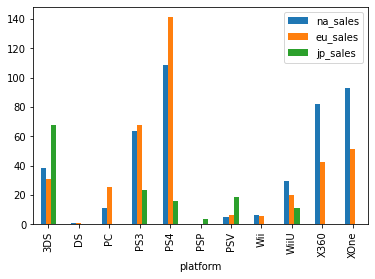

In [70]:
platform_sales_agg.plot(kind='bar')
plt.show()

* findings :
    * Penjualan PS4 di europa sangat tinggi
    * Di negera merika Utara penjualan PS4 juga cukup tinggi

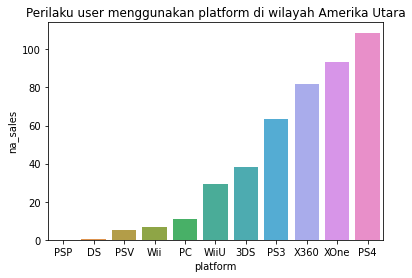

In [71]:
plt.title('Perilaku user menggunakan platform di wilayah Amerika Utara')
sns.barplot(data=platform_sales_agg2.sort_values(by='na_sales'), x='platform', y='na_sales')
plt.show()

* findings :
    * Di amerika utara penjualan PS4 paling tinggi
    * Platform PSP tidak ada tingkat penjualan

* insight :
    * PSP 4 sering dimainkan sama orang Amerika Utara
    * Orang amerika utara tidak memainkan game di platform PSP

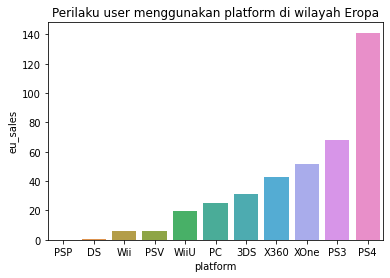

In [72]:
plt.title('Perilaku user menggunakan platform di wilayah Eropa')
sns.barplot(data=platform_sales_agg2.sort_values(by='eu_sales'), x='platform', y='eu_sales')
plt.show()

* findings :
    * Platform PS4 juga menjadi penjualan terbanyak di Eropa
    * Penjualan Platform PSP dan DS menjadi penjualan paling sedikit di Eropa
* insight :
    * Di Eropa, platform PS4 juga sedang populer
    * Hanya sedikit orang yang main game di Platform PSP dan DS di Eropa

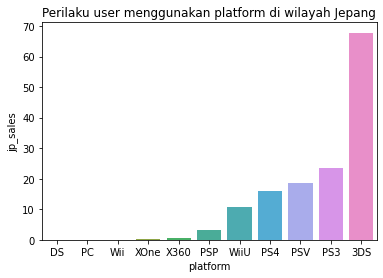

In [73]:
plt.title('Perilaku user menggunakan platform di wilayah Jepang')
sns.barplot(data=platform_sales_agg2.sort_values(by='jp_sales'), x='platform', y='jp_sales')
plt.show()

* findings :
    * Platform 3DS juga menjadi penjualan terbanyak di Jepang
    * Penjualan Platform DS dan PC menjadi penjualan paling sedikit di Jepang
* insight :
    * Di Eropa, platform 3DS juga sedang populer
    * Di Jepang, hanya sedikit orang yang main game di Platform DS dan PC

### Berdasarkan Genre

In [74]:
# agregasikan penjualan di semua wilayah sesuai genre
genre_sales_agg = new_df.groupby(['genre'])[['na_sales', 'eu_sales', 'jp_sales']].sum()
genre_sales_agg2 = new_df.groupby(['genre'])[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
genre_sales_agg2

,genre,na_sales,eu_sales,jp_sales
0,Action,126.05,118.13,40.49
1,Adventure,7.14,8.25,5.82
2,Fighting,15.55,8.55,7.65
3,Misc,27.49,20.04,9.20
4,Platform,18.14,15.58,4.79
5,Puzzle,0.83,1.00,1.18
6,Racing,12.96,20.19,2.30
7,Role-Playing,46.40,36.97,51.04
8,Shooter,109.74,87.86,6.61
9,Simulation,4.86,10.92,4.52


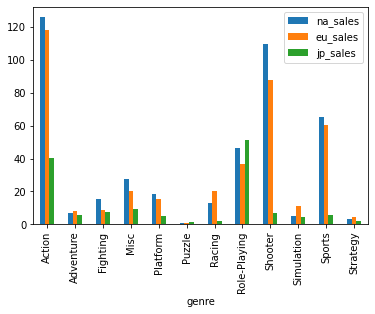

In [75]:
genre_sales_agg.plot(kind='bar')
plt.show()

* findings :
    * Genre Action adalah genre yang paling banyak di mainkan di Amerika Utara dan Eropa
    * Genre Role-Playing adalah genre yang paling banyak di mainkan di Jepang

* Insight : 
    * Genre Action dan Shooter merupakan genre yang sering di mainkan
    * Genre Puzzle merupakan genre yang jarang dimainkan 

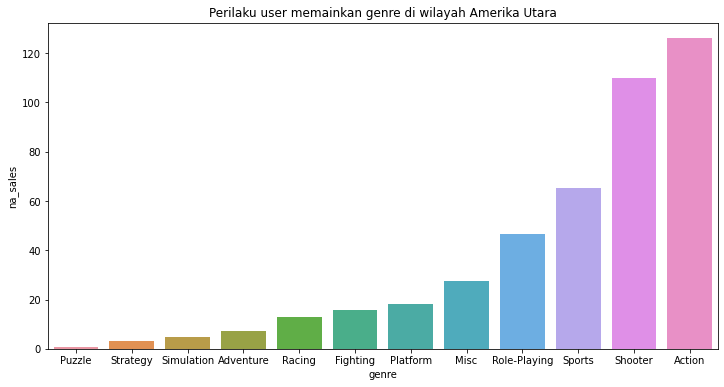

In [76]:
plt.figure(figsize=(12,6))
plt.title('Perilaku user memainkan genre di wilayah Amerika Utara')
sns.barplot(data=genre_sales_agg2.sort_values(by='na_sales'), x='genre', y='na_sales')
plt.show()

* Findings :
    * Genre Action dan Shooter adalah genre yang paling sering dimainkan di Amerika Utara
    * Genre Puzzle adalah genre yang jarang dimainkan orang di Amerika Utara

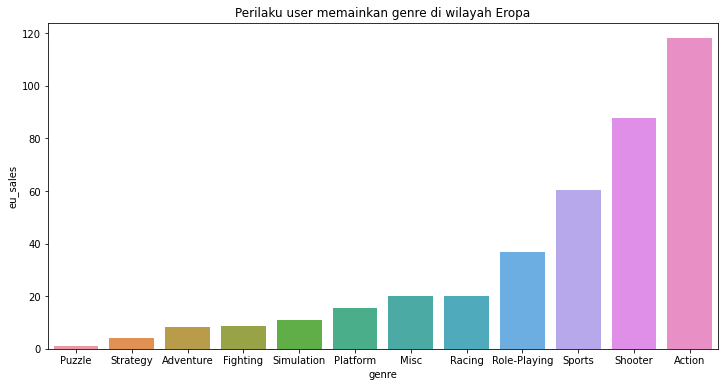

In [77]:
plt.figure(figsize=(12,6))
plt.title('Perilaku user memainkan genre di wilayah Eropa')
sns.barplot(data=genre_sales_agg2.sort_values(by='eu_sales'), x='genre', y='eu_sales')
plt.show()

* Findings :
    * Genre Action dan Shooter adalah genre yang paling sering dimainkan di Eropa
    * Genre Puzzle adalah genre yang jarang dimainkan orang di Eropa

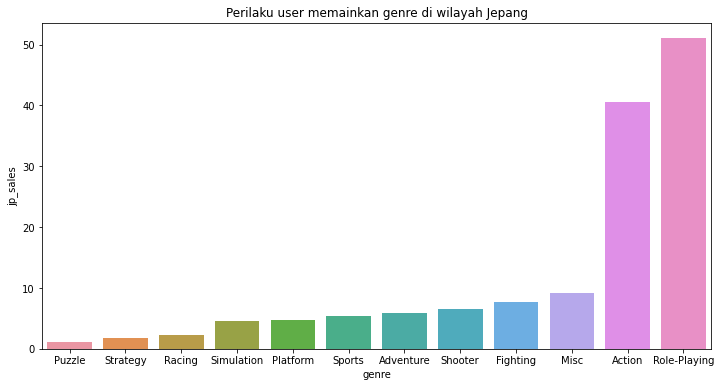

In [78]:
plt.figure(figsize=(12,6))
plt.title('Perilaku user memainkan genre di wilayah Jepang')
sns.barplot(data=genre_sales_agg2.sort_values(by='jp_sales'), x='genre', y='jp_sales')
plt.show()

* Findings :
    * Genre Role-Playing dan Action adalah genre yang paling sering dimainkan di Jepang
    * Genre Puzzle adalah genre yang jarang dimainkan orang di Jepang

In [79]:
genre_sales_transpose = pd.pivot_table(new_df, index='genre',
                                       values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                                       aggfunc='sum').T.reset_index()
genre_sales_transpose

genre,index,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,eu_sales,118.13,8.25,8.55,20.04,15.58,1.00,20.19,36.97,87.86,10.92,60.52,4.22
1,jp_sales,40.49,5.82,7.65,9.20,4.79,1.18,2.30,51.04,6.61,4.52,5.41,1.77
2,na_sales,126.05,7.14,15.55,27.49,18.14,0.83,12.96,46.40,109.74,4.86,65.27,3.28
3,other_sales,37.20,2.43,3.56,6.09,4.12,0.16,4.44,11.48,28.77,1.46,19.45,0.81


In [80]:
genre_sales= pd.pivot_table(new_df, index='genre',
                            values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                            aggfunc='sum').reset_index()
genre_sales

,genre,eu_sales,jp_sales,na_sales,other_sales
0,Action,118.13,40.49,126.05,37.20
1,Adventure,8.25,5.82,7.14,2.43
2,Fighting,8.55,7.65,15.55,3.56
3,Misc,20.04,9.20,27.49,6.09
4,Platform,15.58,4.79,18.14,4.12
5,Puzzle,1.00,1.18,0.83,0.16
6,Racing,20.19,2.30,12.96,4.44
7,Role-Playing,36.97,51.04,46.40,11.48
8,Shooter,87.86,6.61,109.74,28.77
9,Simulation,10.92,4.52,4.86,1.46


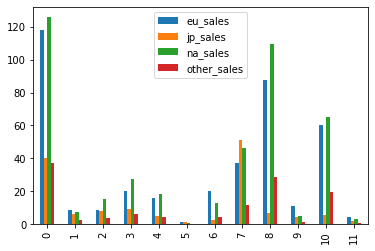

In [81]:
genre_sales.plot(kind='bar')
plt.show()

* findings :
    * Genre Action adalah genre yang paling banyak di mainkan di Amerika Utara dan Eropa
    * Genre Shooter adalah genre yang paling banyak di mainkan di Jepang
    * Genre Action, dan Shooter juga merupakan genre yang paling banyak di wilayah lain
* Insight : 
    * Genre Action dan Shooter merupakan genre yang sering di mainkan
    * Genre Puzzle merupakan genre yang jarang dimainkan 
    * Statistik di wilayah lain lebih sedikit di banding 3 wilayah utama mungkin dapat dikarenakan, persebaran penjualan selain 3 Wilayah besar lebih sedikit

### Berdasarkan Rating

In [82]:
new_df['rating'].value_counts()

M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

In [83]:
# esrb
rating_sales_agg = new_df.groupby(['rating'])[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
rating_sales_agg

,rating,na_sales,eu_sales,jp_sales
0,E,79.05,83.36,15.14
1,E10+,54.24,42.69,5.89
2,M,165.21,145.32,14.11
3,T,49.79,41.95,20.59


**Kesimpulan Sementara**

* Rating M (Mature) adalah Rating yang paling banyak pada platform di Amerika Utara dan Eropa
* Rating T (Teen) adalah rating yang paling banyak pada platform di Jepang
* Banyak game yang berisi gore, kekerasan, darah dan seksualita pada platform di Amerika Utara dan Eropa
* Game di jepang cenderung aman atau SFW (Safe For Work) untuk semua umur

## Uji Hipotesis

### Rata-rata rating pengguna platform Xbox One dan PC adalah sama

* Hipotesis :
     1. H0: Rata-rata rating pengguna platform Xbox One dan PC SAMA
     2. H1: Rata-rata rating pengguna platform Xbox One dan PC BERBEDA
    
    
* Alpha: 5%

In [84]:
# cek jumlah data di kolom platform
new_df['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

In [85]:
new_df2 = new_df[(new_df['user_score'].notnull())].reset_index(drop=True)
new_df2.isnull().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       216
user_score           0
rating              42
total_sales          0
dtype: int64

In [86]:
# prepare dataset platform PC
new_df_pc = new_df[(new_df['platform']=='PC') & (new_df['user_score'].notnull())].reset_index(drop=True)

In [87]:
# prepare dataset platform XOne
new_df_xone = new_df[(new_df['platform']=='XOne') & (new_df['user_score'].notnull())].reset_index(drop=True)

In [88]:
# Buat function uji kenormalan
alpha = 0.05
def normality_test(series):
     # Konversi kolom user_score ke tipe data float
    series['user_score'] = series['user_score'].astype(float)
    
    p_value_shapiro = shapiro(series['user_score']).pvalue
    print(f'P-Value: {p_value_shapiro}')
    print(f'Alpha  : {alpha}')
    if p_value_shapiro >= alpha:
        print('H0 Diterima: Distribusi data tersebut adalah normal')
    else:
        print('H1 Diterima: Distribusi data tersebut adalah tidak normal')

In [89]:
# Uji Kenormalan dari distribusi platform PC dan XOne
normality_test(new_df_pc)
print('---------------------------')
normality_test(new_df_xone)

P-Value: 5.039790721639292e-06
Alpha  : 0.05
H1 Diterima: Distribusi data tersebut adalah tidak normal
---------------------------
P-Value: 1.524856543255737e-05
Alpha  : 0.05
H1 Diterima: Distribusi data tersebut adalah tidak normal


In [90]:
# Uji hipotesisnya
alpha = 0.05

# Ambil kolom 'user_score' dari DataFrame dan konversi ke array
user_score_pc = new_df_pc['user_score'].values
user_score_xone = new_df_xone['user_score'].values

p_value = mannwhitneyu(user_score_pc, user_score_xone, alternative='two-sided').pvalue
print(f'Alpha  : {alpha}')
print(f'P-Value: {p_value}')

if p_value >= alpha:
    print('H0 Diterima: Rata-rata rating pengguna platform PC dan XOne SAMA')
else:
    print('H1 Diterima: Rata-rata rating pengguna platform PC dan XOne BERBEDA')

print('=====================')
print('Rata2 rating di PC', user_score_pc.mean())
print('Rata2 rating di XOne', user_score_xone.mean())

Alpha  : 0.05
P-Value: 0.5011006734622374
H0 Diterima: Rata-rata rating pengguna platform PC dan XOne SAMA
Rata2 rating di PC 6.2696774193548395
Rata2 rating di XOne 6.521428571428572


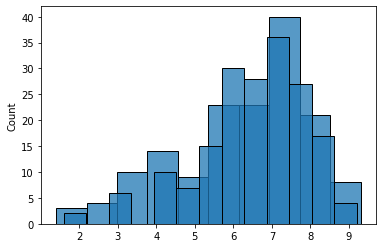

In [91]:
sns.histplot(user_score_pc)
sns.histplot(user_score_xone)
plt.show()

**Kesimpulan Sementara**
* Findings :
    * P-Value dari uji statistik rata-rata rating pengguna platform PC dan XOne adalah 0.5011006734622374
    * Rata-rata rating di PC 6.2696774193548395
    * Rata2 rating di XOne 6.521428571428572
    * Tidak terdapat perbedaan yang signifikan antara rata-rata rating pengguna platform PC dan XOne
    * Nilai p-value adalah 0.5011 lebih besar daripada alpha 0.05. Ini berarti kita tidak memiliki cukup bukti statistik untuk menolak hipotesis nol (H0).
    * Maka H0 diterima, artinya Rata-rata rating pengguna platform Xbox One dan PC SAMA

### Rata-rata rating pengguna genre Action dan Sports berbeda

* Hipotesis :
     1. H0: Rata-rata rating pengguna Genre Action dan Sports dan PC SAMA
     2. H1: Rata-rata rating pengguna Genre Action dan Sports dan PC BERBEDA
    
    
* Alpha: 5%

In [92]:
# cek jumlah data di kolom genre
new_df['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

In [93]:
# Filter data hanya untuk genre Action dan Sports di platform PC
pc_action_sports_data = new_df[(new_df['genre'].isin(['Action', 'Sports'])) & (new_df['platform'] == 'PC')]

# Menghapus nilai NaN dari user_score
pc_action_sports_data = pc_action_sports_data.dropna(subset=['user_score'])

In [94]:
# Uji hipotesisnya
# Lakukan independent t-test untuk membandingkan rata-rata user_score
alpha = 0.05

# Pisahkan data menjadi dua kelompok berdasarkan genre
action_user_score = pc_action_sports_data[pc_action_sports_data['genre'] == 'Action']['user_score']
sports_user_score = pc_action_sports_data[pc_action_sports_data['genre'] == 'Sports']['user_score']

# Menganalisis hasil uji statistik
print(f'Alpha  : {alpha}')

# Bandingkan Genre Action dengan Sports
t_stat_action_sports, p_value_action_sports = ttest_ind(action_user_score, sports_user_score)


if p_value_action_sports < alpha :
    print('H1 Diterima: Rata-rata rating pengguna Genre Action dan Sports di platform PC BERBEDA')
else:
    print('H0 Diterima: Rata-rata rating pengguna Genre Action dan Sports di platform PC SAMA')

# Tampilkan p-value untuk masing-masing perbandingan
print(f'P-Value Action vs. Sports: {p_value_action_sports}')

Alpha  : 0.05
H1 Diterima: Rata-rata rating pengguna Genre Action dan Sports di platform PC BERBEDA
P-Value Action vs. Sports: 0.0008621872006207697


**Kesimpulan Sementara**
* Findings :
    * P-Value dari uji statistik rata-rata rating pengguna platform PC dan XOne adalah 0.0008621872006207697
    * Terdapat perbedaan yang signifikan antara rata-rata rating pengguna Genre Action dan Sports di platform PC 
    * Nilai p-value yang sangat rendah yaitu 0.0009, yang jauh lebih kecil daripada alpha 0.05. Ini menunjukkan bahwa kita memiliki bukti yang kuat untuk menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1)
    * Dengan tingkat signifikansi alpha yang telah ditentukan, ini menunjukkan bahwa rata-rata rating pengguna Genre Action dan Sports di platform PC berbeda.

## Kesimpulan Umum

* A. Data Preprocessing
    * 1. Dataset mentah memiliki 16715 baris dan 11 kolom
    * 2. Terdapat nilai yang hilang pada 6 kolom yaitu Critic_Score, rating, User_Score, Year_of_Release, Name dan Genre.
    * 3. Terdapat tipe data yang salah yaitu Year_of_Release dan User_Score
    * 4. Tidak terdapat duplikasi pada dataset


* B. Data Prepapration
    1. Mengganti nama kolom ke huruf kecil semua
        * Nama kolom telah dirubah ke huruf kecil semua
    2. Menangani nilai yang hilang
        * Nilai yang hilang pada kolom critic_score, rating, dan user_score akan kita biarkan terlebih dahulu, karena jumlah nilai yang hilang sekitar 50% dari keselurahan nilai pada kolom.
        * Menghapus nilai yang hilang pada kolom name dan age karena jumlah nya hanya sedikit sehingga tidak berpengaruh pada keseluruhan data dan untuk mempermudah analisis
        * Mengisi nilai yang hilang pada kolom year_of_release dengan nilai 0, untuk mempermudah analisis
    3. Mengkonversi tipe data yang salah
        * Mengganti tipe data pada kolom year_of_release dari float ke int, karena tahun tidak mungkin bernilai pecahan
        * Mengganti tipe data pada kolom user_score dari object ke float64
    4. Menghitung total penjualan di semua wilayah untuk tiap game
        * Membuat kolom baru yaitu total_sales yang berisi total penjualan di semua wilayah untuk setiap game


* C. Exploratory Data Analysis (EDA)

    1. Meninjau berapa banyak game yang dirilis pada tahun yang berbeda dan apakah data di setiap periode signifikan?
        * findings :
            * Rata-rata jumlah game yang dirilis setiap tahun dari tahun 1980 hingga 2016 adalah 444 
            * Median game yang dirilis setiap tahun dari tahun 1980 hingga 2016 adalah 338
            * Tahun 1980 adalah tahun yang paling sedikit merilis game, yang hanya merilis 9 game 
            * Tahun 2008 adalah tahun yang paling banyak merilis game, yang merilis game sebanyak 1427 game

        * insight :
            * Jumlah Game yang dirilis semakin meningkat dari 1980 hingga 2009
            * Tahun 2008 dan 2009 merupakan tahun yang paling banyak merilis game
            * Setelah tahun 2009 jumlah game yang rilis setiap tahun semakin menurun
    
    2. Bagaimana penjualan bervariasi dari satu platform ke platform lainnya
        * findings :
            * Jumlah penjualan game yang paling sedikit hanya 0.03 juta USD
            * Jumlah penjualan game yang paling banyak adalah sekitar 1255 juta USD
            * Rata-rata jumlah penjualan game adalah 287 juta USD
            * 50% penjualan game dibawah 200 juta USD
            * Platform PS2 adalah game yang memiliki jumlah penjualan paling banyak yaitu sebesar 1255 juta USD
    
        * insight :
            * Jarang orang membeli game yang kurang terkenal
        
    3. Menentukan Periode Waktu Pengambilan Data
        * Terdapat data dari tahun 2016, sekarang adalah bulan Desember tahun 2016 dan kita sedang merencanakan kampanye untuk tahun 2017. 
        * Pada umumnya, dalam dunia industri, data masih valid jika dan hanya jika berusia 5 tahun, artinya data masih relevan untuk lima tahun ke belakang. 
        * Akan tetapi dalam industri game cepat sekali berkembang dan berubah, untuk itu kita perlu memfilter atau mengambil data hanya 3 tahun kebelakang hingga 2013
        * Data awal memiliki 16713 baris, akan tetapi setelah di filter data hanya terdapat 2233 baris data yang relevan
        
    4. Bekerja hanya dengan data yang relevan, dan abaikan data untuk tahun-tahun sebelumnya
        * findings:
            * Platform PS4 mengalami kenaikan penjualan hingga 2015, akan tetapi pada 2016 penjualannya menurun
            * Dalam 3 tahun terakhir, semua platform mengalami penjualan fluktuatif
            * Hampir semua platform mengalami penurunan penjualan setiap tahun
            * Sebuah platform berpotensi menghasilkan keuntungan ketika platform tersebut mengalami total penjualan lebih dari 50 juta USD
           * Platform yang berpotensi menghasilkan keuntungan adalah platform WiiU, X360, 3DS, XOne, PS3 dan PS4
        
    5. Membuat sebuah boxplot untuk penjualan global semua game yang dikelompokkan berdasarkan platform.
        1.  PS4 memiliki rata-rata penjualan sekitar 0.8014, sedangkan PSP hanya memiliki rata-rata sekitar 0.0522. Perbedaan ini cukup signifikan.
        2. Jika kita melihat median, PS3 memiliki nilai tengah sekitar 0.150, sementara PS4 memiliki nilai tengah sekitar 0.200. Meskipun perbedaan ini mungkin tidak sebesar perbedaan dalam mean, masih ada perbedaan yang cukup signifikan.
        3. Nilai maksimum (max) dan minimum (min) juga menunjukkan perbedaan yang signifikan antara platform, seperti PS3 yang memiliki penjualan maksimum sekitar 21.05, sementara PSP hanya memiliki penjualan maksimum sekitar 0.24.

        4. Rata-rata penjualan (mean) pada berbagai platform bervariasi. Beberapa platform memiliki rata-rata penjualan yang lebih tinggi daripada yang lain. Contoh rata-rata penjualan platform tersebut adalah sebagai berikut:

            * PS4 memiliki rata-rata penjualan sekitar 0.8014.
            * X360 memiliki rata-rata penjualan sekitar 0.7355.
            * Wii memiliki rata-rata penjualan sekitar 0.5939.
            * PS3 memiliki rata-rata penjualan sekitar 0.5259.
            * XOne memiliki rata-rata penjualan sekitar 0.6450.
        
    6. Lihat bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer.
        * Korelasi antara total_sales dengan variabel lain pada Platform PS4
            * A. Korelasi kolom total_sales dengan kolom lain 
                * 1. Korelasi total_sales dengan critic_score adalah 0.41 artinya semakin banyak total_sales maka cukup tinggi pula pengaruh critic_score (korelasi medium)
                * 2. Korelasi total_sales dengan user_score adalah -0.034 artinya tidak ada pengaruh user_score terhadap total_sales
    
            * B. Korelasi kolom critic_score dengan kolom lain
                * 1. Korelasi critic_score dengan user_score adalah 0.56 artinya semakin banyak nilai critic_score diberikan maka nilai user_score juga semakin naik akan tetapi tidak terlalu banyak (korelasi medium)
             
        * Berdasarkan visualisasi data scatterplot diatas, dapat disimpulkan bahwa korelasi antara total_sales dan critic_score pada Platform PS4 adalah korelasi medium artinya semakin banyak nilai critic_score maka total penjualan juga semakin naik akan tetapi tidak terlalu banyak

        * Berdasarkan visualisasi data scatterplot diatas, dapat disimpulkan bahwa pada Platform PS4 tidak terdapat korelasi antara total_sales dan user_score 
        
    7. Dengan mengingat kesimpulanmu, bandingkan penjualan game yang sama di platform lain.
        * Korelasi antara total_sales dengan variabel lain pada Platform PC
            * A. Korelasi kolom total_sales dengan kolom lain 
                * 1. Korelasi total_sales dengan critic_score adalah 0.19 artinya semakin tinggi nilai critic_score maka total penjualan juga naik tapi tidak banyak (korelasi lemah)
                * 2. Korelasi total_sales dengan user_score adalah -0.11 artinya semakin rendah nilai user_score maka total penjualan akan naik tapi tidak banyak (korelasi lemah terbalik)    
    
            * B. Korelasi kolom critic_score dengan kolom lain
                * 1. Korelasi critic_score dengan user_score adalah 0.43 artinya semakin banyak nilai critic_score diberikan maka nilai user_score juga semakin naik akan tetapi tidak terlalu banyak (korelasi medium)
        
         * Berdasarkan visualisasi data scatterplot diatas, dapat disimpulkan bahwa korelasi antara total_sales dan critic_score pada Platform PC adalah korelasi lemah artinya semakin tinggi nilai critic_score maka total penjualan juga naik tapi tidak banyak
         * Berdasarkan visualisasi data scatterplot diatas, dapat disimpulkan bahwa korelasi antara total_sales dan user_score pada platform PC terdapat korelasi lemah terbalik artinya semakin rendah nilai user_score maka total penjualan akan naik tapi tidak banyak
        
    8. Mengamati distribusi umum game berdasarkan genre.
        * A. 
            * findings : 
                * Genre Action merupakan genre yang memiliki total penjualan terbanyak
                * Genre Puzzle merupakan genra yang memiliki total penjualan paling sedikit

            * insight :
                * Orang-orang lebih sering dan suka bermain game yang bergenre Action daripada genre lainnya
                * Genre Shooter, Sports, dan Role-Playing juga merupakan genre yang banyak orang memainkannya
                * Orang jarang mau membeli game yang bergenre puzzle
        
        * B. 
            * findings : 
                * Genre Action merupakan genre yang memiliki total penjualan terbanyak
                * Genre Puzzle merupakan genra yang memiliki total penjualan paling sedikit
                * Hampir semua genre memiliki outlier total penjualan

            * insight :
                * Orang-orang lebih sering dan suka bermain game yang bergenre Action daripada genre lainnya
                * Genre Shooter, Sports, dan Role-Playing juga merupakan genre yang banyak orang memainkannya
                * Orang jarang mau membeli game yang bergenre puzzle
                
    9. Melakukan Pemrofilan Pengguna untuk Masing-Masing Wilayah
        1. Berdasarkan Platform
            * A. Secara Keseluruhan
                * findings :
                    * Market Share pada negara jepang di dominasi oleh platform PSP
                    * Di negara jepang platform DS memiliki market share yang paling rendah

                * insgiht :
                    * Game PSP sedang populer di jepang, daripada di wilayah lain

            * B. Di Wilayah Ameria Utara (NA)
                * findings :
                    * Di amerika utara penjualan PS4 paling tinggi
                    * Di negera Amerika Utara penjualan PS4 juga cukup tinggi
                    * Platform PSP tidak ada tingkat penjualan

                * insight :
                    * PSP 4 sering dimainkan sama orang Amerika Utara
                    * Orang amerika utara tidak memainkan game di platform PSP

            * C. Di Wilayah Eropa (EU)
                * findings :
                    * Platform PS4 juga menjadi penjualan terbanyak di Eropa
                    * Penjualan PS4 di europa sangat tinggi
                    * Penjualan Platform PSP dan DS menjadi penjualan paling sedikit di Eropa

                * insight :
                    * Di Eropa, platform PS4 juga sedang populer
                    * Hanya sedikit orang yang main game di Platform PSP dan DS di Eropa

            * D. Di Wilayah Jepang (JP)
                * findings :
                    * Platform 3DS juga menjadi penjualan terbanyak di Jepang
                    * Penjualan Platform DS dan PC menjadi penjualan paling sedikit di Jepang
                * insight :
                    * Di Eropa, platform 3DS juga sedang populer
                    * Di Jepang, hanya sedikit orang yang main game di Platform DS dan PC
        
        2. Berdasarkan Genre
            * A. Secara Keseluruhan
                * findings :
                    * Genre Action adalah genre yang paling banyak di mainkan di Amerika Utara dan Eropa
                    * Genre Role-Playing adalah genre yang paling banyak di mainkan di Jepang
                    * Genre Action, dan Shooter juga merupakan genre yang paling banyak di wilayah lain

                * Insight : 
                    * Genre Action dan Shooter merupakan genre yang sering di mainkan
                    * Genre Puzzle merupakan genre yang jarang dimainkan 
                    * Statistik di wilayah lain lebih sedikit di banding 3 wilayah utama mungkin dapat dikarenakan, persebaran penjualan selain 3 Wilayah besar lebih sedikit
                
            * B. Di Wilayah Ameria Utara (NA)
                * Findings :
                    * Genre Action dan Shooter adalah genre yang paling sering dimainkan di Amerika Utara
                    * Genre Puzzle adalah genre yang jarang dimainkan orang di Amerika Utara
            
            * C. Di Wilayah Eropa (EU)
                * Findings :
                    * Genre Action dan Shooter adalah genre yang paling sering dimainkan di Eropa
                    * Genre Puzzle adalah genre yang jarang dimainkan orang di Eropa
            
            * D. Di Wilayah Jepang (JP)
                * Findings :
                    * Genre Role-Playing dan Action adalah genre yang paling sering dimainkan di Jepang
                    * Genre Puzzle adalah genre yang jarang dimainkan orang di Jepang

        3. Berdasarkan Genre
            * Rating M (Mature) adalah Rating yang paling banyak pada platform di Amerika Utara dan Eropa
            * Rating T (Teen) adalah rating yang paling banyak pada platform di Jepang
            * Banyak game yang berisi gore, kekerasan, darah dan seksualita pada platform di Amerika Utara dan Eropa
            * Game di jepang cenderung aman atau SFW (Safe For Work) untuk semua umur


* D. Uji Hipotesis

   1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama
        * Findings :
            * P-Value dari uji statistik rata-rata rating pengguna platform PC dan XOne adalah 0.5011006734622374
            * Rata-rata rating di PC 6.2696774193548395
            * Rata2 rating di XOne 6.521428571428572
            * Tidak terdapat perbedaan yang signifikan antara rata-rata rating pengguna platform PC dan XOne
            * Nilai p-value adalah 0.5011 lebih besar daripada alpha 0.05. Ini berarti kita tidak memiliki cukup bukti statistik untuk menolak hipotesis nol (H0).
            * Maka H0 diterima, artinya Rata-rata rating pengguna platform Xbox One dan PC SAMA

   2. Rata-rata rating pengguna genre Action dan Sports berbeda
        * Findings :
            * P-Value dari uji statistik rata-rata rating pengguna platform PC dan XOne adalah 0.0008621872006207697
            * Terdapat perbedaan yang signifikan antara rata-rata rating pengguna Genre Action dan Sports di platform PC 
            * Nilai p-value yang sangat rendah yaitu 0.0009, yang jauh lebih kecil daripada alpha 0.05. Ini menunjukkan bahwa kita memiliki bukti yang kuat untuk menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1)
            * Dengan tingkat signifikansi alpha yang telah ditentukan, ini menunjukkan bahwa rata-rata rating pengguna Genre Action dan Sports di platform PC berbeda.
    